# import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Load the data

In [7]:
# # Load the data 
merged_data = pd.read_csv("merged_data.csv")
print(merged_data)


     orderID   orderDate CustomerName              state       city  \
0    B-25601    1/4/2018       Bharat            Gujarat  Ahmedabad   
1    B-25602    1/4/2018        Pearl        Maharashtra       Pune   
2    B-25603    3/4/2018        Jahan     Madhya Pradesh     Bhopal   
3    B-25604    3/4/2018       Divsha          Rajasthan     Jaipur   
4    B-25605    5/4/2018      Kasheen        West Bengal    Kolkata   
..       ...         ...          ...                ...        ...   
495  B-26096  28-03-2019       Atharv        West Bengal    Kolkata   
496  B-26097  28-03-2019         Vini          Karnataka  Bangalore   
497  B-26098  29-03-2019        Pinky  Jammu and Kashmir    Kashmir   
498  B-26099  30-03-2019       Bhishm        Maharashtra     Mumbai   
499  B-26100  31-03-2019       Hitika     Madhya Pradesh     Indore   

     TotalAmount  TotalProfit  Totalquantity  \
0         1429.0      -1218.0             19   
1         3889.0        975.0             22   
2  

### Create a new column year  month to aggregate

In [8]:
# import pandas as pd

# Load the data
# merged_data = pd.read_csv("merged_data.csv")

# Convert 'Order Date' to datetime
merged_data['orderDate'] = pd.to_datetime(merged_data['orderDate'], errors='coerce')

# Create a 'YearMonth' column
merged_data['YearMonth'] = merged_data['orderDate'].dt.to_period('M')  # Converts to Year-Month format (e.g., 2022-01)

# If you need it as a string (optional)
merged_data['YearMonthStr'] = merged_data['orderDate'].dt.strftime('%Y-%m')

# Save the updated data (if needed)
merged_data.to_csv("merged_data_with_yearmonth.csv", index=False)

# Preview
print(merged_data[['orderDate', 'YearMonth', 'YearMonthStr']].head())


   orderDate YearMonth YearMonthStr
0 2018-01-04   2018-01      2018-01
1 2018-01-04   2018-01      2018-01
2 2018-03-04   2018-03      2018-03
3 2018-03-04   2018-03      2018-03
4 2018-05-04   2018-05      2018-05


## 1: Aggregate Sales Data Over Time (e.g., by Month i.e selecting orderdate,totalamount column)

In [9]:

# Convert 'orderDate' to datetime format
merged_data['orderDate'] = pd.to_datetime(merged_data['orderDate'], errors='coerce')

# Aggregate sales data by month
monthly_sales = merged_data.resample('M', on='orderDate')['TotalAmount'].sum().reset_index()

# Rename columns for clarity
monthly_sales.rename(columns={'orderDate': 'Month', 'TotalAmount': 'TotalSales'}, inplace=True)

# Display the results
print(monthly_sales)

# Save the aggregated data (if needed)
monthly_sales.to_csv("monthly_sales.csv", index=False)


        Month  TotalSales
0  2018-01-31     18035.0
1  2018-02-28      6566.0
2  2018-03-31      7434.0
3  2018-04-30      8811.0
4  2018-05-31      8829.0
5  2018-06-30      6686.0
6  2018-07-31      7755.0
7  2018-08-31     20331.0
8  2018-09-30      4861.0
9  2018-10-31     15550.0
10 2018-11-30     13297.0
11 2018-12-31      5917.0
12 2019-01-31      1389.0
13 2019-02-28      1777.0
14 2019-03-31      8935.0
15 2019-04-30     11079.0
16 2019-05-31      4390.0
17 2019-06-30      3392.0
18 2019-07-31      5116.0
19 2019-08-31      6557.0
20 2019-09-30      5583.0
21 2019-10-31     14147.0
22 2019-11-30      2235.0
23 2019-12-31       259.0


### Line chart to visualize the output

In [14]:
# print(merged_data)
chart = pd.read_csv("monthly_sales.csv")
print(chart)

         Month  TotalSales
0   2018-01-31     18035.0
1   2018-02-28      6566.0
2   2018-03-31      7434.0
3   2018-04-30      8811.0
4   2018-05-31      8829.0
5   2018-06-30      6686.0
6   2018-07-31      7755.0
7   2018-08-31     20331.0
8   2018-09-30      4861.0
9   2018-10-31     15550.0
10  2018-11-30     13297.0
11  2018-12-31      5917.0
12  2019-01-31      1389.0
13  2019-02-28      1777.0
14  2019-03-31      8935.0
15  2019-04-30     11079.0
16  2019-05-31      4390.0
17  2019-06-30      3392.0
18  2019-07-31      5116.0
19  2019-08-31      6557.0
20  2019-09-30      5583.0
21  2019-10-31     14147.0
22  2019-11-30      2235.0
23  2019-12-31       259.0


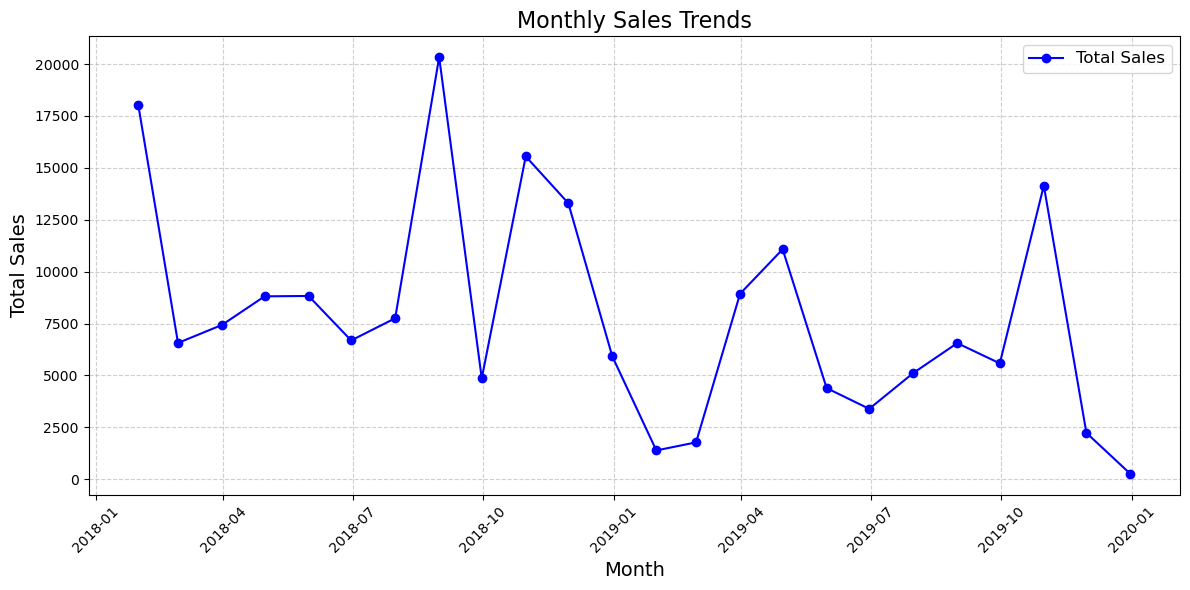

In [12]:
# Load the saved aggregated sales data
chart = pd.read_csv("monthly_sales.csv")
# print(chart)
#  line chart to visualize the report

import matplotlib.pyplot as plt


# Ensure the 'Month' column is in datetime format
chart['Month'] = pd.to_datetime(chart['Month'])

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(chart['Month'], chart['TotalSales'], marker='o', linestyle='-', color='b', label='Total Sales')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## 2. Train and evaluate forecasting models (using Prophet Model).

In [2]:
# print(merged_data)
# import sales target data
sales = pd.read_csv("Sales target.csv")
print(sales)

   Month_of_Order_Date     Category  Target
0               18-Apr    Furniture   10400
1               18-May    Furniture   10500
2               18-Jun    Furniture   10600
3               18-Jul    Furniture   10800
4               18-Aug    Furniture   10900
5               18-Sep    Furniture   11000
6               18-Oct    Furniture   11100
7               18-Nov    Furniture   11300
8               18-Dec    Furniture   11400
9               19-Jan    Furniture   11500
10              19-Feb    Furniture   11600
11              19-Mar    Furniture   11800
12              18-Apr     Clothing   12000
13              18-May     Clothing   12000
14              18-Jun     Clothing   12000
15              18-Jul     Clothing   14000
16              18-Aug     Clothing   14000
17              18-Sep     Clothing   14000
18              18-Oct     Clothing   16000
19              18-Nov     Clothing   16000
20              18-Dec     Clothing   16000
21              19-Jan     Cloth

#### Step 2: Ensure date columns are in datetime format


In [15]:
merged_data['orderDate'] = pd.to_datetime(merged_data['orderDate'])
chart['Month'] = pd.to_datetime(chart['Month'])

### Renaming columns to ds and y

In [18]:
chart = chart.rename(columns={'Month': 'ds', 'TotalSales': 'y'})
print(chart)

           ds        y
0  2018-01-31  18035.0
1  2018-02-28   6566.0
2  2018-03-31   7434.0
3  2018-04-30   8811.0
4  2018-05-31   8829.0
5  2018-06-30   6686.0
6  2018-07-31   7755.0
7  2018-08-31  20331.0
8  2018-09-30   4861.0
9  2018-10-31  15550.0
10 2018-11-30  13297.0
11 2018-12-31   5917.0
12 2019-01-31   1389.0
13 2019-02-28   1777.0
14 2019-03-31   8935.0
15 2019-04-30  11079.0
16 2019-05-31   4390.0
17 2019-06-30   3392.0
18 2019-07-31   5116.0
19 2019-08-31   6557.0
20 2019-09-30   5583.0
21 2019-10-31  14147.0
22 2019-11-30   2235.0
23 2019-12-31    259.0


### Prediction and importing prophet model

In [21]:
from prophet import Prophet

17:41:27 - cmdstanpy - INFO - Chain [1] start processing
17:41:35 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

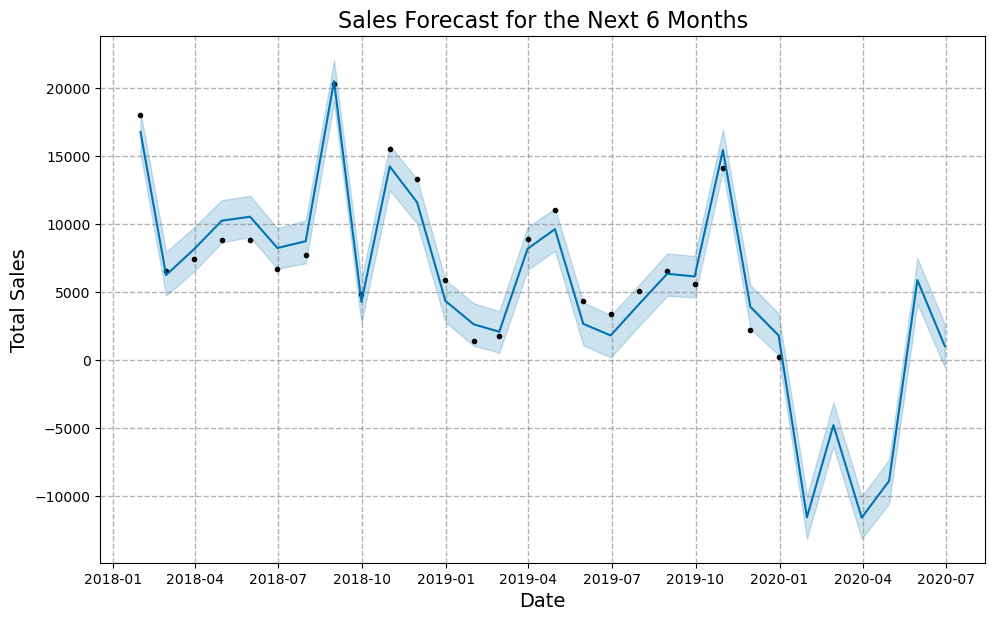

,ds,yhat,yhat_lower,yhat_upper
24,2020-01-31,-11545.890391,-13111.533229,-9982.606958
25,2020-02-29,-4771.716878,-6352.914540,-3100.991383
26,2020-03-31,-11566.878711,-13123.896614,-10011.763888
27,2020-04-30,-8872.221406,-10538.487268,-7295.984531
28,2020-05-31,5892.086538,4143.127614,7507.453699
29,2020-06-30,1037.822811,-531.462338,2654.796546


In [22]:
# # Assuming merged_data contains columns 'ds' (Date) and 'y' (Sales)
# # Make sure 'ds' is in datetime format
chart['ds'] = pd.to_datetime(chart['ds'])

# # Step 1: Fit the Prophet model
model = Prophet(yearly_seasonality=True)  # Optionally enable yearly seasonality
model.fit(chart)

# # Step 2: Create a future dataframe for the next 6 months
future = model.make_future_dataframe( periods=6, freq='M')  # 'periods=6' means 6 months ahead

# # Step 3: Make predictions for the future periods
forecast = model.predict(future)

# # Step 4: Plot the forecast
plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title('Sales Forecast for the Next 6 Months', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# # Optionally, print the forecasted values for the next 6 months
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)  # View the predictions for the next 6 months
# # saving the predicted values
# # forecast.to_csv("forecast_values.csv", index=False)